**Importing necessary libraries:**

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import scipy.spatial
import random
import math
from collections import Counter

**Downloading images from Google:**

In [ ]:
! pip install simple_image_download                                           # installing simple_image_download library
from simple_image_download import simple_image_download as simp               
response = simp.simple_image_download

response().download("soccer goal with net", 600)                              # downloading 600 images for each class
response().download("basketball hoop with net", 600)

os.rename("/content/drive/MyDrive/Stat.Learning/HW1/Part 1/photos/soccer goal with net", "/content/drive/MyDrive/Stat.Learning/HW1/Part 1/photos/goal")
os.rename("/content/drive/MyDrive/Stat.Learning/HW1/Part 1/photos/basketball hoop with net", "/content/drive/MyDrive/Stat.Learning/HW1/Part 1/photos/hoop")

**Defining a function to create the training data:**

In [90]:
data_dir = "/content/drive/MyDrive/Stat.Learning/HW1/Part 1/photos"             # data directory
categories = ["goal","hoop"]                                                    # list of classes

train_data = []                                                                 # creating training data list
img_size = 200                                                                  # common size of all pictures

def create_train_data():
  for ctg in categories:
    path = os.path.join(data_dir, ctg)                                          # creating paths to directory of goals or hoops
    cls_num = categories.index(ctg)                                             # labeling pictures by using indexes (0 = goal, 1 = hoop)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   # converting all images into grayscale and creating corresponding arrays   
        new_img_array = cv2.resize(img_array,(img_size,img_size))               # resizing all the images, so that all of them will be the same size
        train_data.append([new_img_array, cls_num])                             # appending arrays and classification numbers to the training data list  
      except Exception as e:                                                    # using try...except statement to avoid errors
        pass

create_train_data()

random.shuffle(train_data)                                                      # shuffling the data in order to learn the labels in a mixed way

**Creating lists of features and labels:**

In [91]:
X = []                                                                          
y = []

for features, label in train_data:
  X.append(features)                                                            # seperating features and labels from each other
  y.append(label)

X = np.array(X).reshape(-1, img_size * img_size)                                # Converting the features list X into a numpy array

**Splitting the data:**

In [92]:
n_train = math.floor(0.9 * X.shape[0])                     # First 90% of data is being used in training phase.
n_test = math.ceil(0.1 * X.shape[0])                       # Last 10% of data is being used during testing.
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

**Defining k-NN class :**

In [93]:
class KNN:
  def __init__(self, k):
    self.k = k                                                             # defining k
  
  def fit(self, X, y):                                                     # defining the function learning from training data        
    self.X_train = X
    self.y_train = y
  
  def distance(self, X1, X2):                                              # defining the function calculating the Euclidean distance between two points
    distance = scipy.spatial.distance.euclidean(X1, X2)        
  
  def predict(self, X_test):                                               # defining the function predicting the labels of test images
    output = []
    for i in range(len(X_test)):
      d = []
      votes = []
      for j in range(len(X_train)):
        dist = scipy.spatial.distance.euclidean(X_train[j], X_test[i])     # calculating the Euclidean distance between training and test inputs
        d.append([dist, j])                                                # appending these distances to the list d
      d.sort()                                                             # sorting the elements in d
      d = d[0:self.k]
      for d, j in d:
          votes.append(y_train[j])
      ans = Counter(votes).most_common(1)[0][0]
      output.append(ans)
    return output

  def score(self, prediction, y_test):
    count = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            count +=1
    return count/len(prediction)*100

**Making predictions and finding accuracies for different k's:**

Text(0.5, 1.0, 'Accuracy with respect to k')

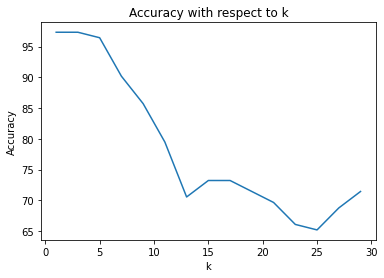

In [94]:
accur = []
ks = []

for i in range(1,31,2):
  ata = KNN(i)
  ata.fit(X_train, y_train)
  prediction = ata.predict(X_test)
  acc = ata.score(prediction, y_test)
  ks.append(i)
  accur.append(acc)

plt.plot(ks, accur)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect to k")